Importujemy ponownie powtórzone `numpy`, dodajemy moduł do tworzenia wykresów `pyplot`.

In [2]:
import numpy as np
import pylab as py

# Zapoznanie się z regresją liniową
* W ramach tego ćwiczenia będziemy chcieli opisać zbiór danych modelem liniowym.
* Zbiór danych stworzymy sami w sposób sztuczny, ale w typowych problemach zebranie i obróbka danych stanowi znaczącą część pracy.
* Nasz liniowy model ma postać: $y = \theta_0 + \theta_1 x$
* Dane wytworzymy dla konkretnych $\theta_0$ i $\theta_1$, a następnie zaimplementujemy regresję liniową, aby znaleźć jak najlepsze przybliżenie dla tych parametrów.
* `(X,Y)` to ciąg uczący. *Co to ciąg uczący?*

## Produkcja danych

Zacznijmy od produkcji $x$. W późniejszej części ćwiczenia zobaczymy, że wygodniej je mieć w postaci wektora kolumnowego, można użyć `reshape` teraz lub później:

In [3]:
ile = 10 
x = np.linspace(0, 10, ile).reshape(ile,1)
print(x)

[[ 0.        ]
 [ 1.11111111]
 [ 2.22222222]
 [ 3.33333333]
 [ 4.44444444]
 [ 5.55555556]
 [ 6.66666667]
 [ 7.77777778]
 [ 8.88888889]
 [10.        ]]


Ustalamy parametry dla symulacji $\theta_0 = 1$ i $\theta_1 = 3$:

In [4]:
theta0 = 1
theta1 = 3

Teraz produkujemy odpowiadające $y$ korzystając z wybranych parametrów.

In [5]:
y =theta0 + theta1*x

Obejrzyjmy te dane:

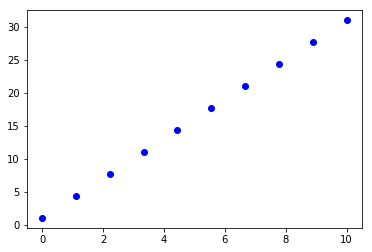

In [6]:
py.plot(x, y, 'bo')
py.show()

Skomplikujmy trochę zadanie dla naszej regresji. Wprowadźmy coś na kształt szumu, dodając do każdego $y$ małą liczbę losową z N(0,1).

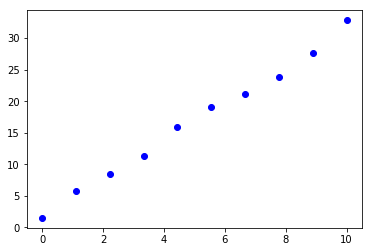

In [8]:
mu, sigma = 0, 1 # mean and standard deviation
#noise = np.random.normal(mu, sigma, ile).reshape(len(x),1)
noise=np.random.uniform(-1,1,ile).reshape(len(x),1)
#noise=np.random.standard_t(3,ile).reshape(len(x),1)
y=y+noise
py.plot(x, y, 'bo')
py.show()

## Algorytm równań normalnych
Proszę napisać funkcję, która:
* na wejściu przyjmuje ciąg uczący, implementuje wzór na parametry optymalne na podstawie [równań normalnych](http://brain.fuw.edu.pl/edu/index.php/Uczenie_maszynowe_i_sztuczne_sieci_neuronowe/Wykład_1#Minimalizacja_funkcji_kosztu ). 
* Funkcja powinna zwracać estymowane parametry theta.
* Proszę dorysować prostą reprezentującą hipotezę do wykresu punktów ciągu uczącego.
* dla przypomnienia: odwrotność macierzy można obliczyć w numpy funkcją: <tt>numpy.linalg.inv</tt>
* proszę zwrócić uwagę, że konieczne jest użycie wektorów kolumnowych!

Podpowiedź: aby skorzystać ze wzorów z wykładu, macierz wejść $X$ musi zawierać nie tylko kolumnę $x$, ale także kolumnę jedynek, aby przemnożona przez wektor [$\theta_0$ $\theta_1$] dawała odpowiedni wektor (kolumnowy) wyjść $y$.

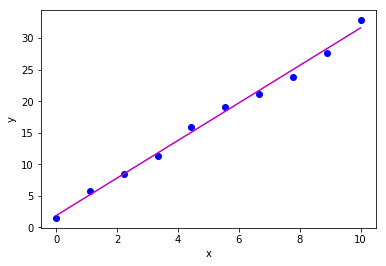

theta_est= [[1.87441412]
 [2.97422259]]


In [9]:
def licz_rownania_normalne(X, Y):
    X = np.hstack((np.ones((len(x),1)),x ))
    Y = y
    theta = np.dot( np.dot(np.linalg.inv( np.dot(X.T,X)  ),X.T) ,Y)
    
    y_reg = np.dot(X,theta)
    py.figure()
    py.plot(X[:,1], Y,'bo')
    py.plot(X[:,1],y_reg,'m')
    py.xlabel("x")
    py.ylabel("y")
    py.show()
    return theta


#print(X)
#print(Y)
X=x
Y=y
theta_est = licz_rownania_normalne(X, Y)
print("theta_est=",theta_est)



## Algorytm gradientowy stochastyczny 
Proszę napisać funkcję, która znajduje optymalne parametry theta wg algorytmu gradientowego stochastycznego (metoda najmniejszych kwadratów). Funkcja jako argumenty przyjmuje ciąg uczący, (dowolne) wartości początkowe theta i parametr szybkości zbiegania alpha.

Na wyjściu funkcja powinna zwracać wyestymowane wartości parametrów.

W ramach ilustracji po każdej iteracji proszę dorysować prostą parametryzowaną przez aktualne wartości parametrów. 

In [10]:
def licz_iteracyjnie_stoch(X, Y, theta0 = np.array([0.5,2]).reshape(2,1), alpha = 0.001, epochs = 500000):
    X = np.hstack((np.ones((len(x),1)),x ))
    Y = y
    for i in range(epochs):
        #losuję przykład
        i = np.random.randint(len(x))
        xx = X[i].reshape(1,2)
        delta =(np.dot(xx,theta0) -Y[i]) * xx.T
        theta0 = theta0 - alpha * delta
        
        
        #y_reg = np.dot(X,theta0)
        #py.figure()
        #py.plot(X[:,1], Y,'bo')
        #py.plot(X[:,1],y_reg,'m')
        #py.xlabel("x")
        #py.ylabel("y")
    return theta0

X=x
Y=y
theta_est = licz_iteracyjnie_stoch(X, Y)
print("theta_est=",theta_est)


theta_est= [[1.89729749]
 [2.95819744]]


## Algortym gradientowy zbiorczy
Proszę napisać funkcję, która znajduje optymalne parametry theta wg. algorytmy gradientowego zbiorczego. Funkcja jako argumenty przyjmuje ciąg uczący, wartości początkowe theta i parametr szybkości zbiegania alpha.
Na wyjściu funkcja powinna zwracać wyestymowane wartości parametrów.

W ramach ilustracji po każdej iteracji proszę dorysować prostą parametryzowaną przez aktualne wartości parametrów. 

In [11]:
def licz_iteracyjnie_batch(X, Y, theta0 = np.array([0.5,2]).reshape(2,1), alpha = 0.001, epochs = 100000):
    X = np.hstack((np.ones((len(X),1)),X ))
    Y = y
    
    
    for i in range(epochs):
        delta=np.zeros(2).reshape(2,1)
        for j in range(np.size(X,0)):
            xx = X[j].reshape(1,2)
            delta =delta+(np.dot(xx,theta0) -Y[j]) * xx.T
        
        theta0 = theta0 - alpha * delta
        #y_reg = np.dot(X,theta0)
        #py.figure()
        #py.plot(X[:,1], Y,'bo')
        #py.plot(X[:,1],y_reg,'m')
        #py.xlabel("x")
        #py.ylabel("y")
    return theta0

X=x
Y=y
theta_est = licz_iteracyjnie_batch(X,Y)
print("theta_est=",theta_est)

# 1. Ciąg uczący - zbiór przykładów (najlepiej: dobrze reprezentujących problem).
# 2. Szybkość zbiegania zbyt mała: potrzeba bardzo dużo kroków, za duża: skakanie między minimami lub nawet rozbieżność.
# 3. Badane algorytmy optymalizacyjne działają sensownie również dla rozkładów błędów innych niż normalny.

theta_est= [[1.87441412]
 [2.97422259]]


## Porównanie algorytmów
* Proszę sprawdzić zbieżność algorytmów w zależności od parametrów szybkości zbiegania.
* Proszę sprawdzić czy algorytmy optymalizacyjne działają poprawnie dla danych gdzie błąd podlega innym rozkładom prawdopodobieństwa niż normalny. np. rozkład jednorodny lub  t o 3 st. swobody.